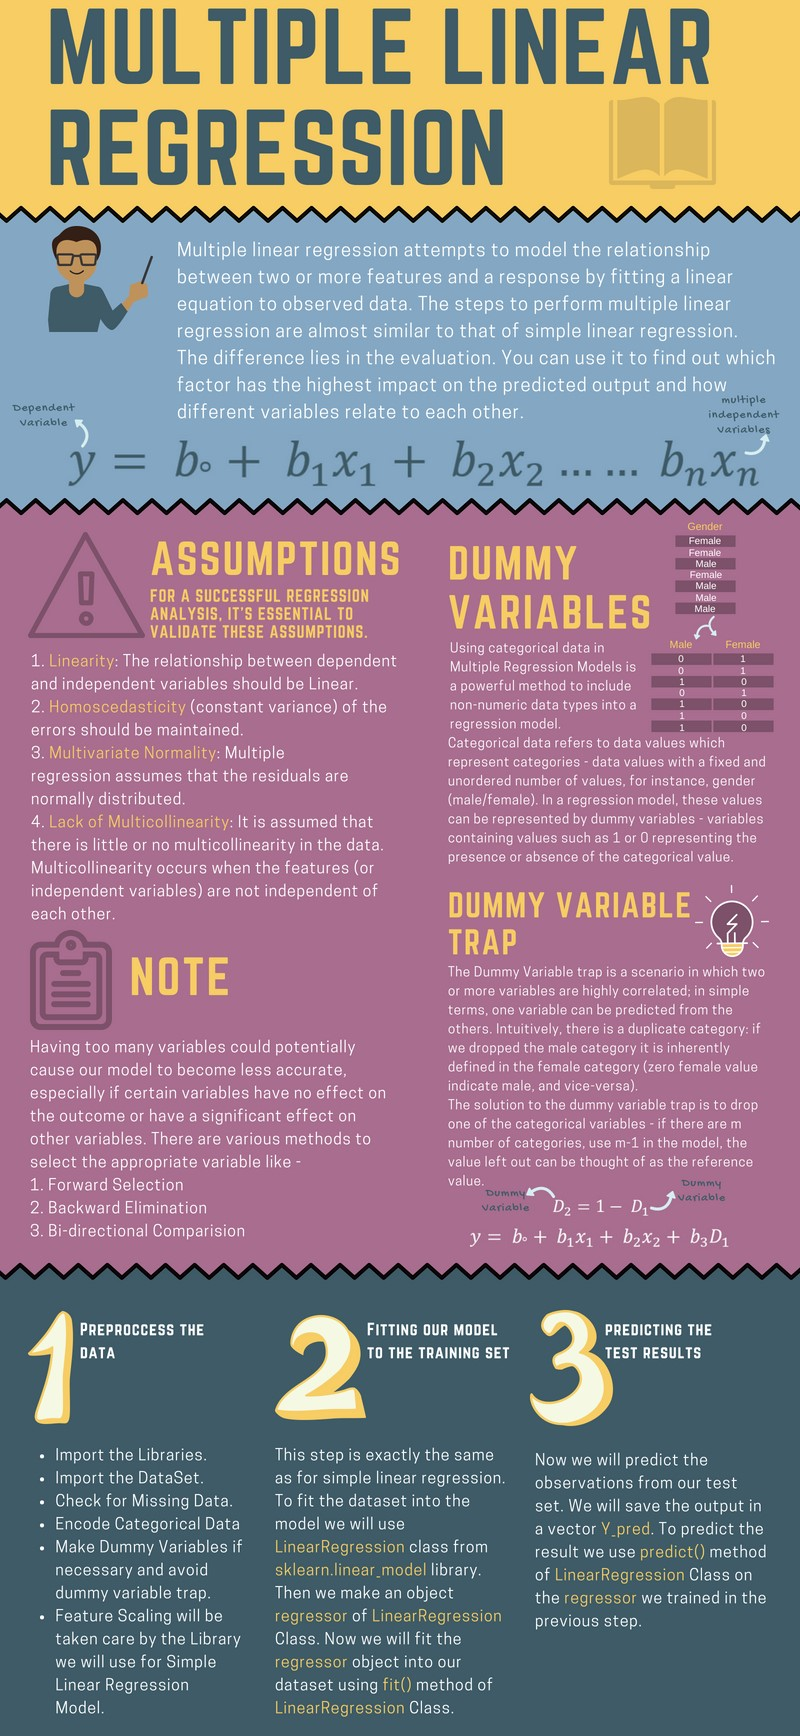

## Importing Libraries

In [12]:
import pandas as pd
import numpy as np

## Loading Dataset

In [13]:
dataset = pd.read_csv("datasets/50_Startups.csv")

In [14]:
X = dataset.iloc[:, :4].values # or X = dataset.iloc[:,:-1].values

In [15]:
Y = dataset.iloc[:, 4].values

## Encoding Data

* Label Encoding in Python can be achieved using Sklearn Library. Sklearn provides a very efficient tool for encoding the levels of categorical features into numeric values. LabelEncoder encode labels with a value between 0 and n_classes-1 where n is the number of distinct labels.
* OneHotEncoder. This encoding is needed for feeding categorical data to many scikit-learn estimators, notably linear models and SVMs with the standard kernels.

In [16]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer # equivalent code for OneHotEncoder
labelencoder = LabelEncoder()
X[: , 3] = labelencoder.fit_transform(X[ : , 3])
# onehotencoder = OneHotEncoder(categorical_features = [3]) 
ct = ColumnTransformer([("State", OneHotEncoder(), [3])], remainder = 'passthrough')
X = ct.fit_transform(X)

## Avoiding Dummy Variable Trap

In [17]:
X = X[:,1:]

## Splitting Dataset Into Training And Testing Set

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

## Fitting Multiple Linear Regression To The Training Set

In [19]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

## Predicting the Test set results

In [20]:
Y_pred = regressor.predict(X_test)

## Calculating Accuracy

In [21]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.9347068473282446